# Agent-based Modeling: Covid-19

This notebook contains an implementation of our Covid-19 simulation using agent-based modeling. We want to demonstrate how the spread of the virus affects our society. The model was implemented using [BPTK_Py](https://bptk.transentis-labs.com/en/latest/docs/api/api_overview.html#). This framework not only enables us to do agent-based modeling, it can also manage simulation scenarios easily.

In [1]:
from BPTK_Py.bptk import bptk

bptk = bptk()

With this model, the goal is to figure out the amount of people an infected person infects over a certain period of time. We call this value the reproduction rate `R0`. Assuming `R0` is 2. The following picture shows how the virus spreads.


![Image](images/r0.png)

We want to make assumptions which reflects the current situation in Germany.

__Assumptions__

- __Contact Rate: 20 persons.__ Defines how many people a person encounters per day in average.
- __Infectivity: 0.7%.__ Defines the probability that a person becomes infected after contact with an infectious person.
- __All__ people can get infected.

Each person is equivalent to one agent. Each agent can have the following states: `HEALTHY`, `INFECTED WITH NO/LIGHT SYMPTOMS`, `INFECTED WITH STRONG SYMPTOMS`. Usually, if someone gets infected and realizes strong symptoms, he stays at home to rest. Therefore nobody can get infected by this person. People with light or no symptoms are still able to leave the house. These are the ones who continue the chain of infection. We implement this scenario into our model.

## Base Scenario

The base scenario presents the results of the above assumptions. Instead of 80 million agents we only create 8,000. Running 80 mio. agents through the model would take forever. However, it won't falsify the results. Before we analyze the results, we first need to understand the process of the simulation. 

![Image](images/abm_diagram.png)

The following plot shows the number of agents who are healthy, infected with no/light symptoms and strong symptoms for each day.

Output()

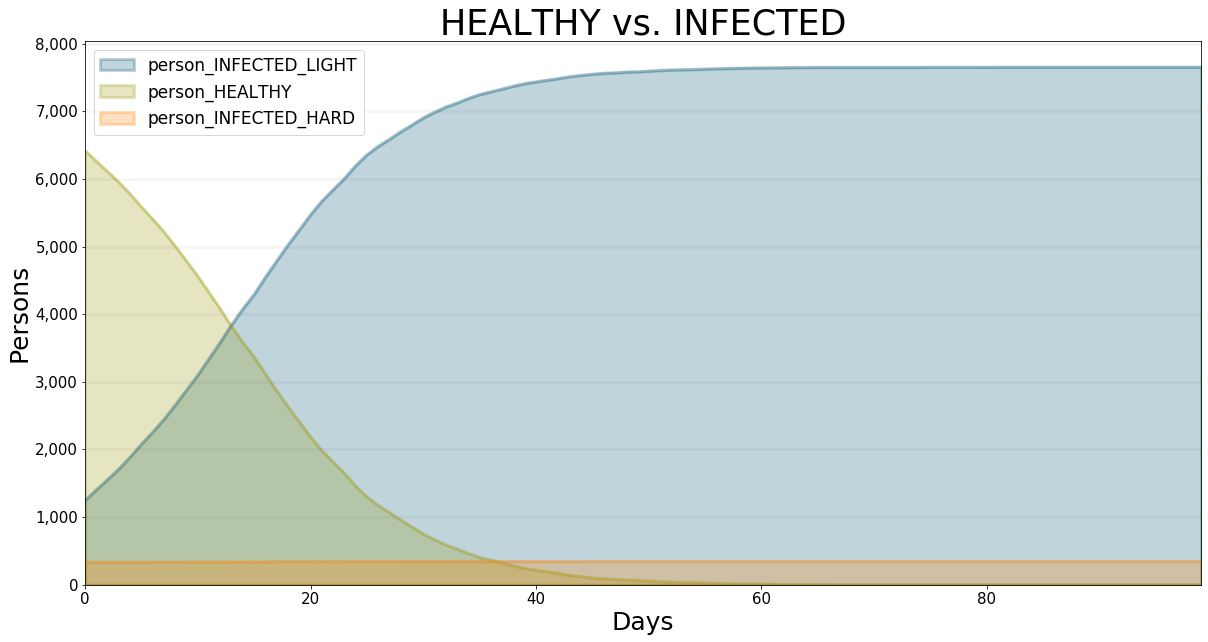

In [2]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="HEALTHY vs. INFECTED",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_LIGHT","INFECTED_HARD"],
    series_names={
        "person_HEALTHY":"Healthy",
        "person_INFECTED_LIGHT":"Infected with light symptoms",
        "person_INFECTED_HARD":"Infected with strong symptoms",
    },
    visualize_to_period = 100,
    progress_bar=True
    
)

In [3]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_HARD","INFECTED_LIGHT"],
    return_df=True,
    visualize_to_period = 30
)

,person_INFECTED_LIGHT,person_HEALTHY,person_INFECTED_HARD
t,,,
0,1247,6419.0,334
1,1406,6259.0,335
2,1557,6108.0,335
3,1715,5950.0,335
4,1890,5775.0,335
5,2080,5584.0,336
6,2258,5405.0,337
7,2447,5216.0,337
8,2659,5004.0,337


The second plot is the more interesting one. It helps us to figure out how many agents one agent infects over a certain period of time. According to the plot, it infects around 0.13 agents per day. 

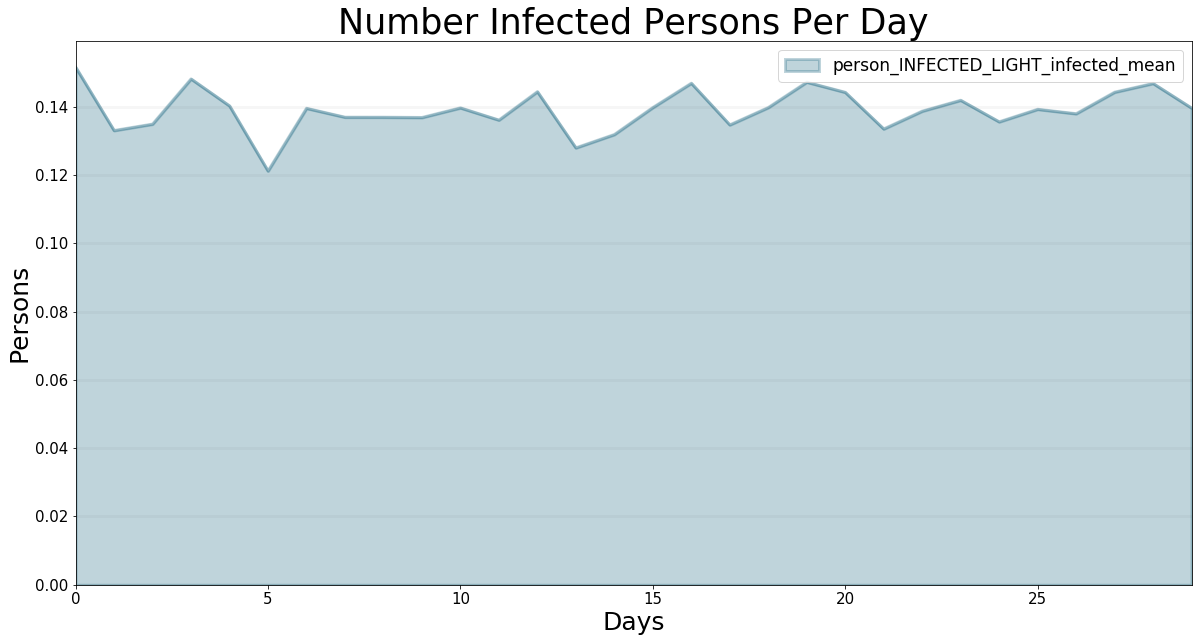

In [43]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons Per Day",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30
)

The above plot gives us a roughly number. However, we can also compute the exact number of agents getting infected per day in average.

In [5]:
r0_df = bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30,
    return_df=True
)

In [39]:
print("A person with Covid-19 infects around {} per day.".format(r0_df.mean()["person_INFECTED_LIGHT_infected_mean"]))

A person with Covid-19 infects around 0.13894713409273513 per day.


In [34]:
def output_text(x):
    return "A person with Covid-19 infects around {} persons in {} days.".format(round((r0_df.mean()*x)["person_INFECTED_LIGHT_infected_mean"]),x)


In [42]:
interact(output_text, x=widgets.IntSlider(min=0, max=30, step=1, value=30));

interactive(children=(IntSlider(value=30, description='x', max=30), Output()), _dom_classes=('widget-interact'…